In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diary data
diary_df = pd.read_csv('data/processed/ratings_tmdb.csv')

# Convert 'Watched Date' to datetime for time-based analyses
diary_df['Watched Date'] = pd.to_datetime(diary_df['Watched Date'])
diary_df['Year Watched'] = diary_df['Watched Date'].dt.year

sns.set(style="whitegrid")


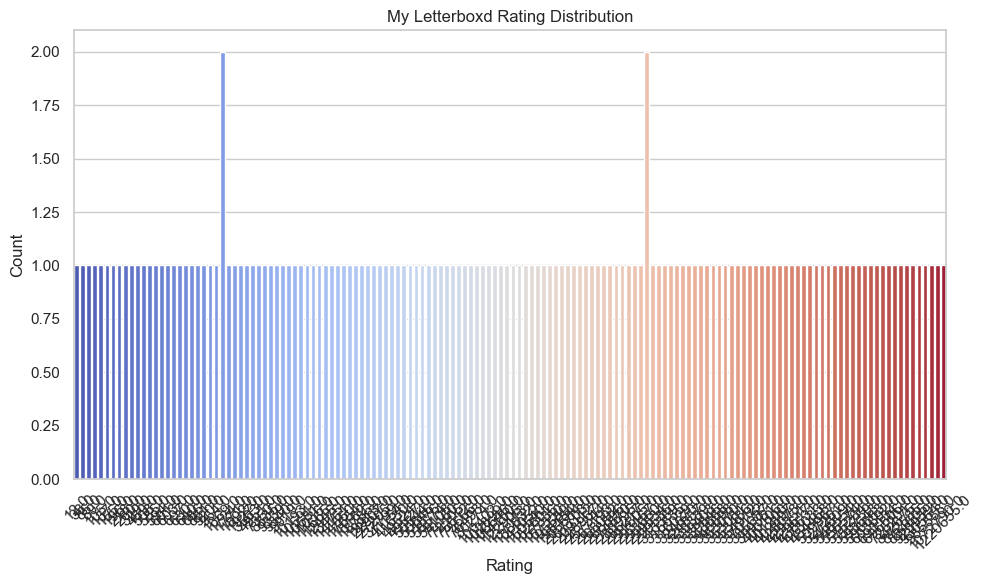

In [24]:

# Analysis 1: Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=diary_df, palette='coolwarm')
plt.title('My Letterboxd Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Rated Movies:
                                    Name     Rating    Year
93             Reacher - Prime Premiere  1220655.0  2023.0
467                      Anyone But You  1072790.0  2023.0
460                       Normal People   985558.0  2020.0
97                             Saltburn   930564.0  2023.0
457  The Wonderful Story of Henry Sugar   923939.0  2023.0
463                    No Hard Feelings   884605.0  2023.0
127                         Oppenheimer   872585.0  2023.0
567                 The Wandering Earth   842675.0  2019.0
500                        The Gray Man   725201.0  2022.0
501                    The Adam Project   696806.0  2022.0


c:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


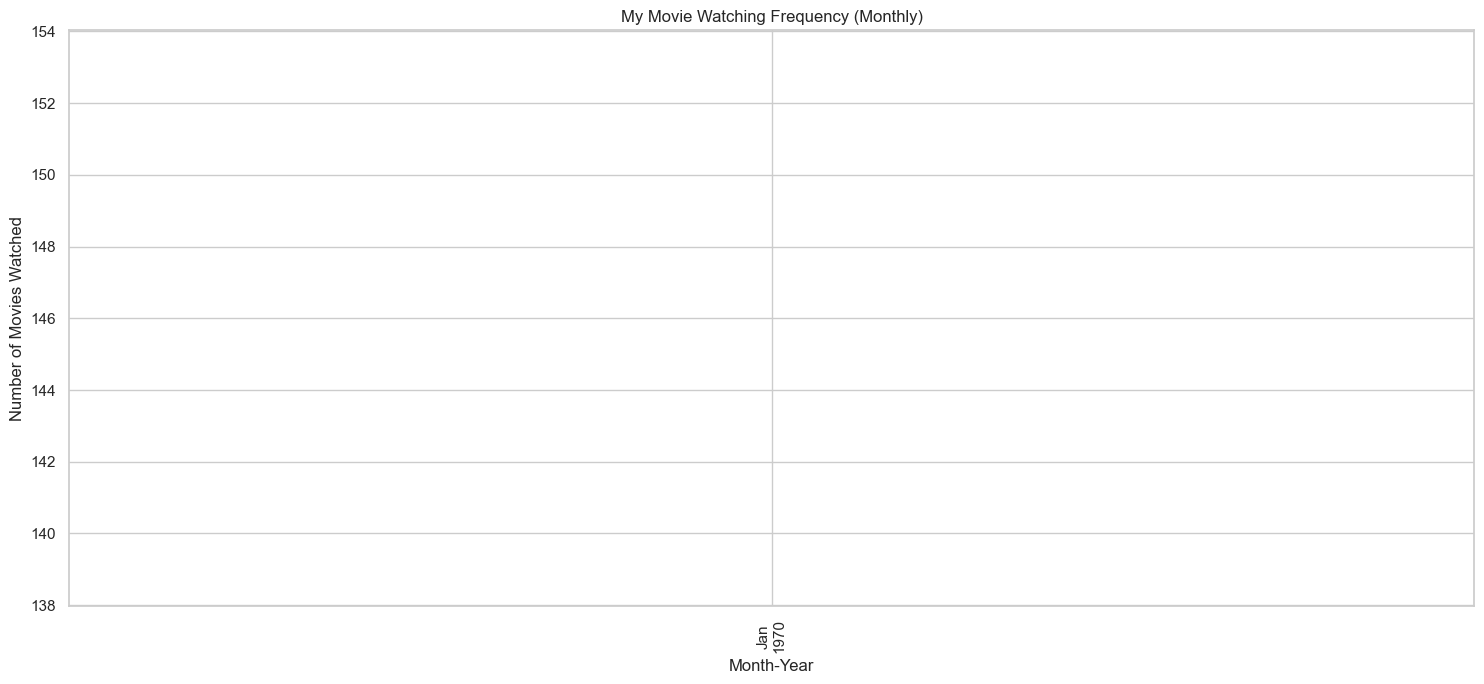

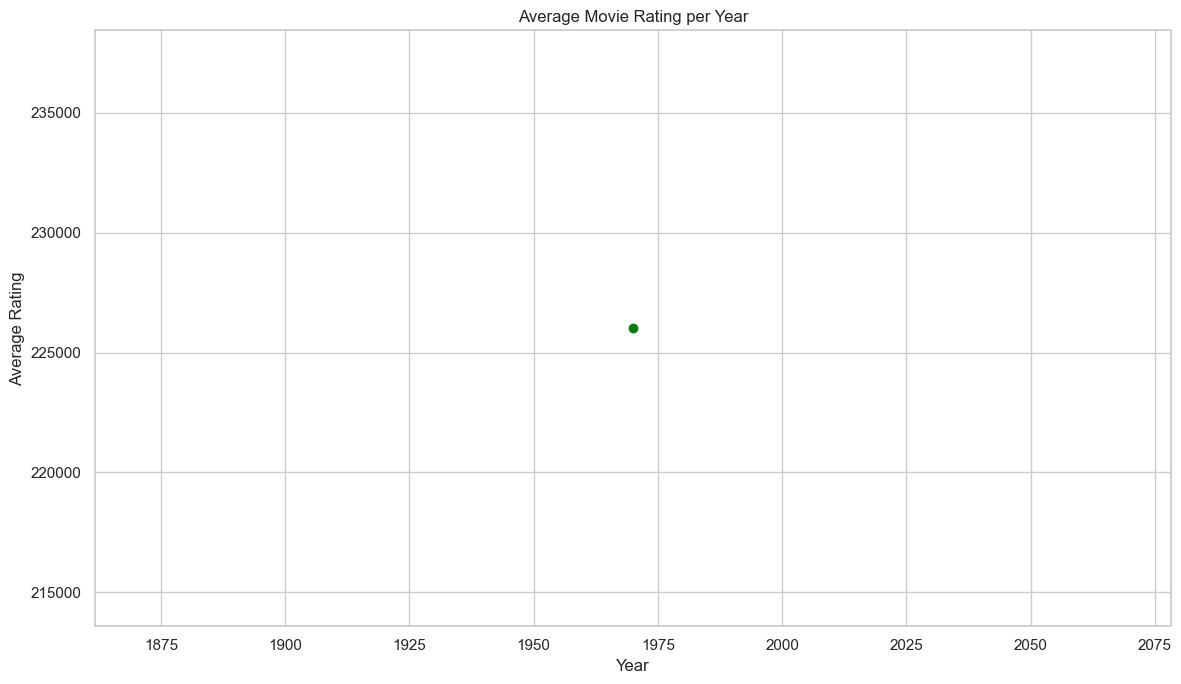


No Rewatches Recorded


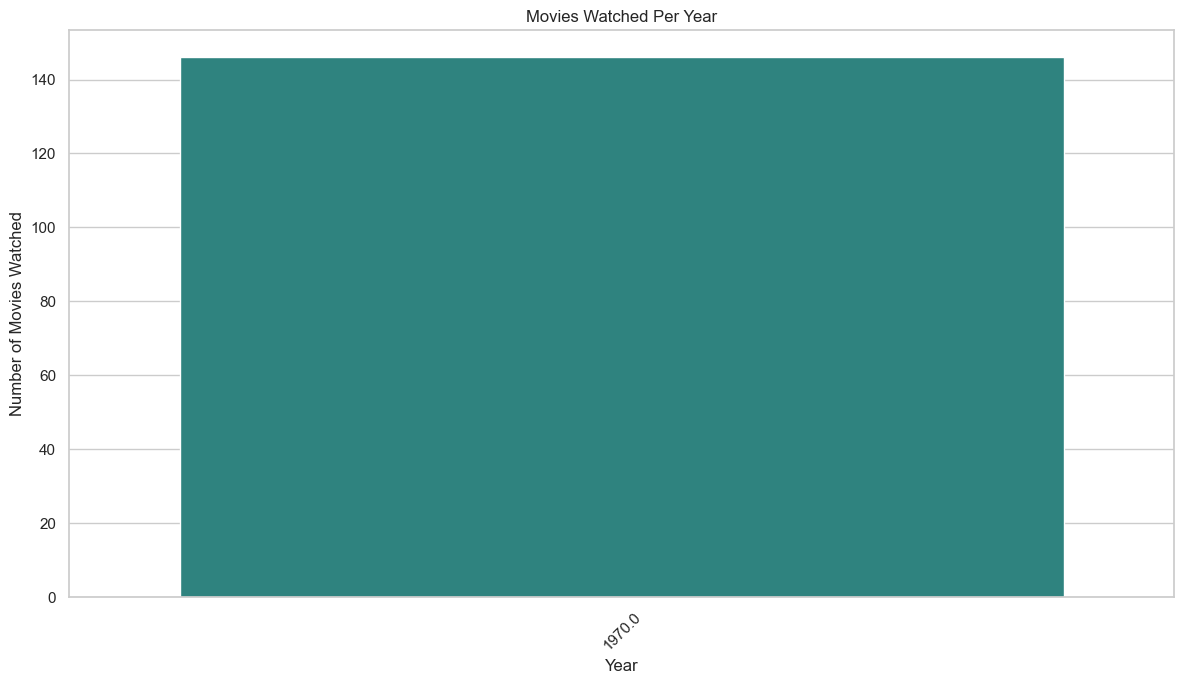

In [25]:

# 1. Top Rated Movies
top_rated = diary_df[diary_df['Rating'] >= 4.5].sort_values(by='Rating', ascending=False)[['Name', 'Rating', 'Year']]
print("Top Rated Movies:\n", top_rated.head(10))

# 2. Ratings Frequency (Monthly)
diary_df['Month-Year'] = diary_df['Watched Date'].dt.to_period('M')
monthly_watches = diary_df.groupby('Month-Year').size()
plt.figure(figsize=(15, 7))
monthly_watches.plot(color='purple')
plt.title('My Movie Watching Frequency (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Movies Watched')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Rating Trends Over Time
yearly_rating_avg = diary_df.groupby('Year Watched')['Rating'].mean()
plt.figure(figsize=(12, 7))
yearly_rating_avg.plot(kind='line', marker='o', color='green')
plt.title('Average Movie Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# 4. Rewatch Analysis
rewatches = diary_df[diary_df['Rewatch'] == True]['Name'].value_counts()
if not rewatches.empty:
    print("\nMovies Rewatched Most:\n", rewatches.head(5))
else:
    print("\nNo Rewatches Recorded")

# General Movie Watching Trend (Yearly)
plt.figure(figsize=(12, 7))
sns.countplot(x='Year Watched', data=diary_df, palette='viridis')
plt.title('Movies Watched Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

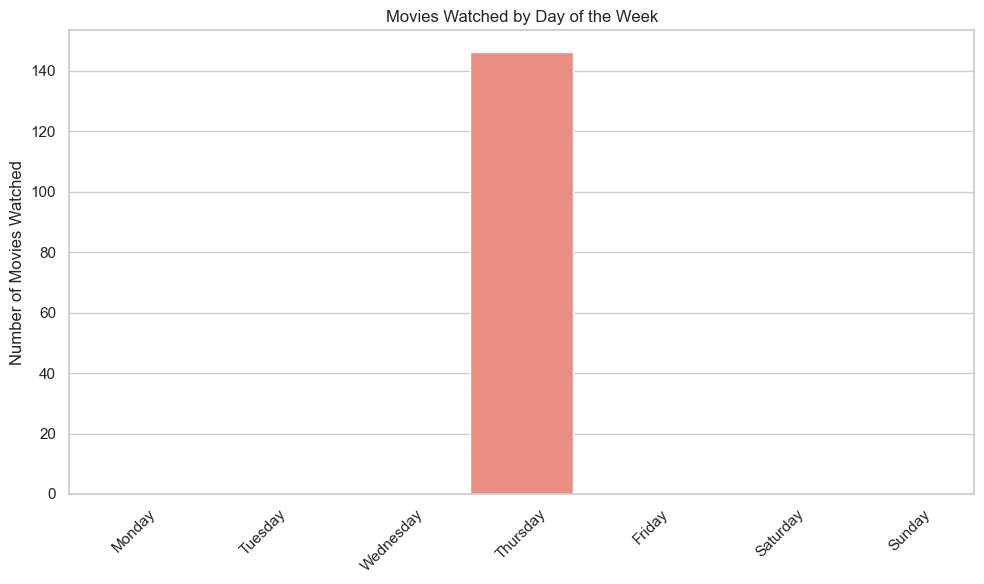

In [26]:
diary_df['Date'] = pd.to_datetime(diary_df['Date'])
diary_df['Day of Week'] = diary_df['Watched Date'].dt.day_name()

# 1. Distribution of Watched Movies by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=diary_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set3')
plt.title('Movies Watched by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Movies Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

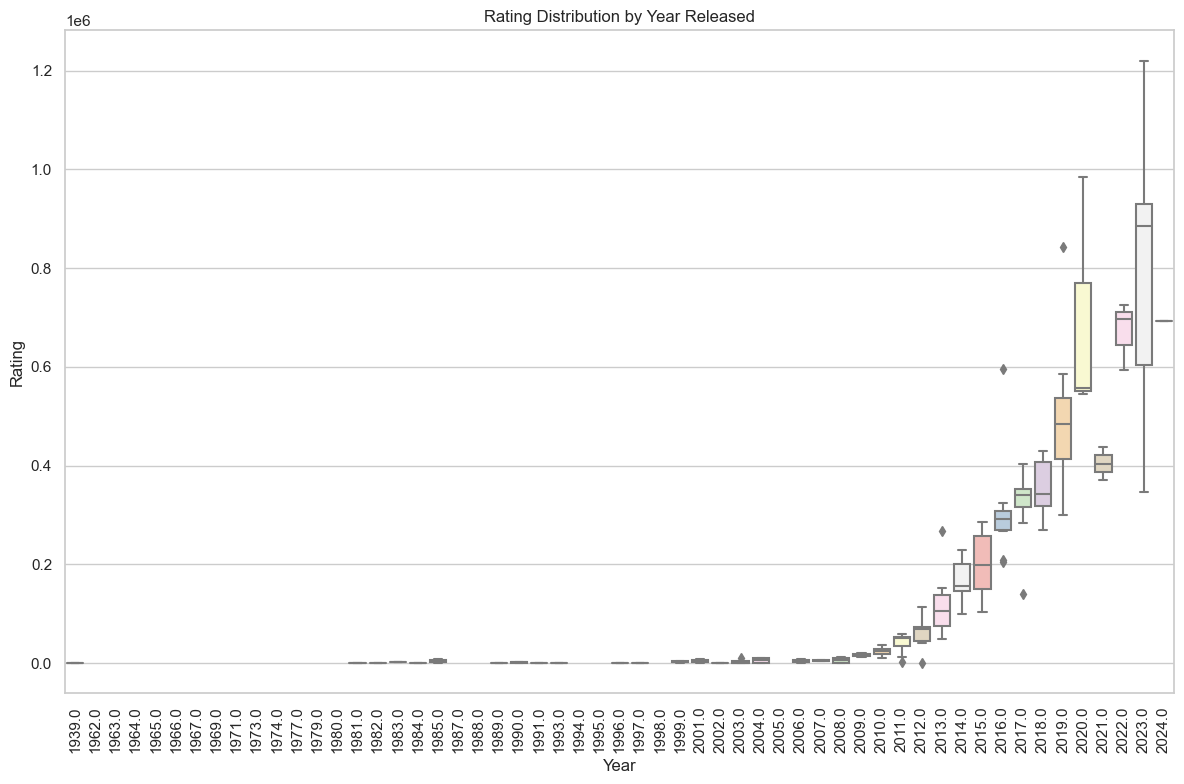

In [27]:
# 3. Rating Distribution by Year Released
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Rating', data=diary_df, palette='Pastel1')
plt.title('Rating Distribution by Year Released')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

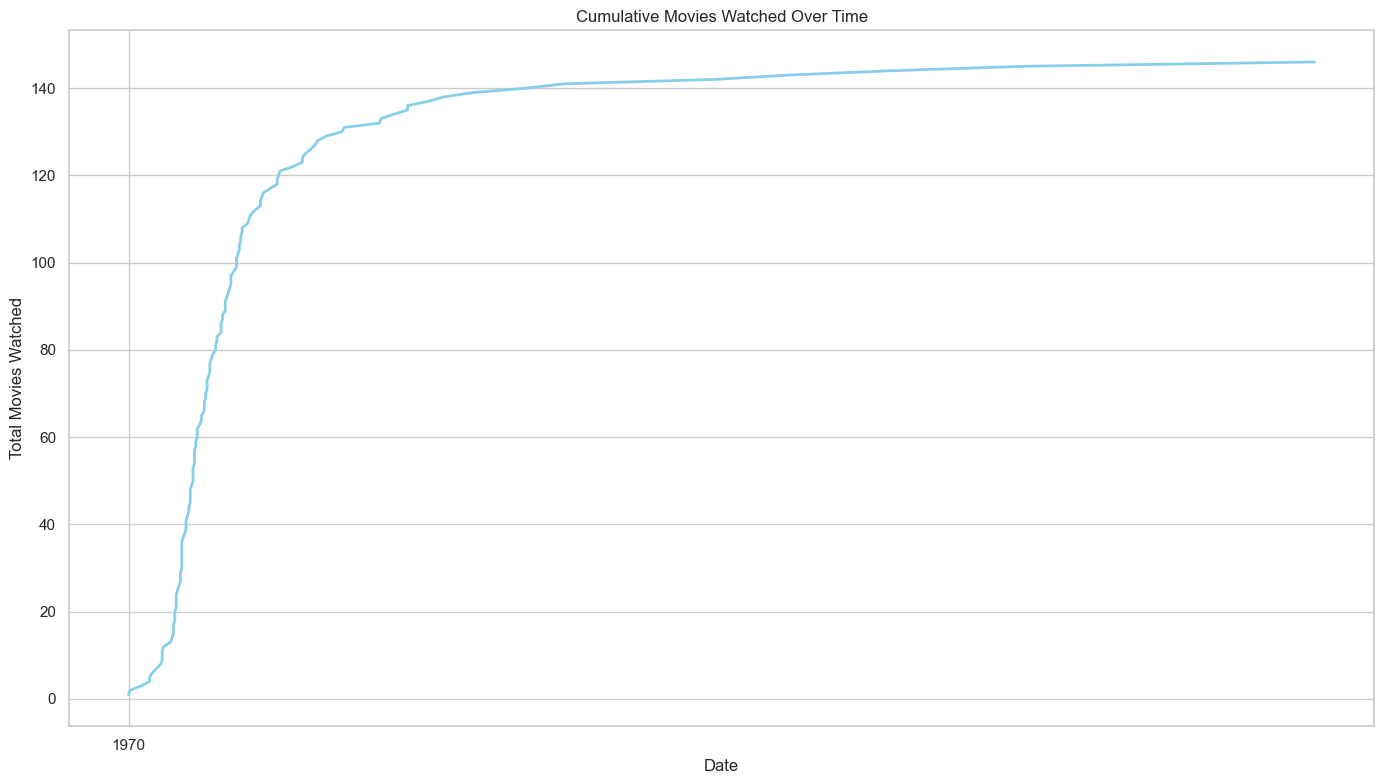

In [28]:
# 4. Cumulative Movies Watched Over Time
diary_df.sort_values('Watched Date', inplace=True)
diary_df['Cumulative Movies'] = range(1, len(diary_df) + 1)

plt.figure(figsize=(14, 8))
plt.plot(diary_df['Watched Date'], diary_df['Cumulative Movies'], marker='', color='skyblue', linewidth=2)
plt.title('Cumulative Movies Watched Over Time')
plt.xlabel('Date')
plt.ylabel('Total Movies Watched')
plt.tight_layout()
plt.show()